<a href="https://colab.research.google.com/github/dhananjay0007/dnn_practice/blob/main/cat_vs_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.05G/1.06G [00:10<00:00, 173MB/s]
100% 1.06G/1.06G [00:10<00:00, 113MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
from keras.layers.regularization.spatial_dropout3d import Dropout
from keras.layers.normalization.batch_normalization_v1 import BatchNormalization
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,BatchNormalization, Dropout 

In [6]:
# Building Train and test dataset
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train', 
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 20000 files belonging to 2 classes.


In [7]:
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 5000 files belonging to 2 classes.


In [8]:
train_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [9]:
# Normalize
def process(image, label):
  image = tf.cast(image/255, tf.float32)
  return image, label

In [10]:
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [11]:
# Create CNN Model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())


model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
history =  model.fit(train_ds, epochs=1, validation_data=validation_ds)

625/625 [==============================] - 76s 99ms/step - loss: 1.7981 - accuracy: 0.5307 - val_loss: 0.6889 - val_accuracy: 0.5254


In [15]:
from keras.applications.vgg16 import VGG16

In [16]:
base_model = VGG16(
    weights = 'imagenet',
    include_top = False,
    input_shape = (256,256,3)
)
base_model.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [17]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [18]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
# either you can change the input shape of neutral net
# Or you can change the image size

In [21]:
history1 = model.fit(train_ds, epochs=1, validation_data=validation_ds)

625/625 [==============================] - 61s 97ms/step - loss: 0.7228 - accuracy: 0.5042 - val_loss: 0.7039 - val_accuracy: 0.4976


In [24]:
history1.__dict__

{'validation_data': None,
 'model': <keras.engine.sequential.Sequential at 0x7f448d60f1c0>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [0.7227591872215271],
  'accuracy': [0.5041999816894531],
  'val_loss': [0.7039380073547363],
  'val_accuracy': [0.4975999891757965]},
 'params': {'verbose': 1, 'epochs': 1, 'steps': 625},
 'epoch': [0]}

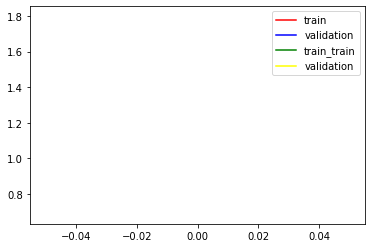

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.plot(history1.history['loss'], color='green', label='train_train')
plt.plot(history1.history['val_loss'], color='yellow', label='validation')
plt.legend()
plt.show()